# Writing
This notebook serves as an aid for the writing process. 
1. figure out a good outline for the implementation section 
2. create figures where helpful 


# Outline

Broadly the implementation consists of a balancing algorithm and a number of algorithms that allow this balancing algorithm to work. 

The implementation maniuplates the control flow graph 



In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 
    

/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/notebooks


In [2]:
%autoreload 2
import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


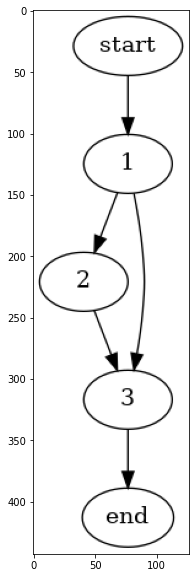

In [3]:
from rwtools.nemesis.graph.utils import get_root 
from rwtools.nemesis.control_flow_graph import ControlFlowGraph
import networkx as nx

G = nx.DiGraph()

G.add_edge("start", 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 3)
G.add_edge(3, "end")


fig, axs = plt.subplots(1, figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

P.write_png('graph.png')
plt.imshow(mpimg.imread("graph.png"))
# plt.imshow(nx.nx_pydot.to_pydot(G))

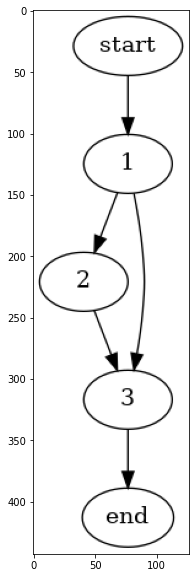

In [4]:
G = nx.DiGraph()

G.add_edge("start", 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 3)
G.add_edge(3, "end")


fig, axs = plt.subplots(1, figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

name = "opt_code"
P.write_png(f'{name}.png')

plt.imshow(mpimg.imread(f'{name}.png'))
# plt.imshow(nx.nx_pydot.to_pydot(G))

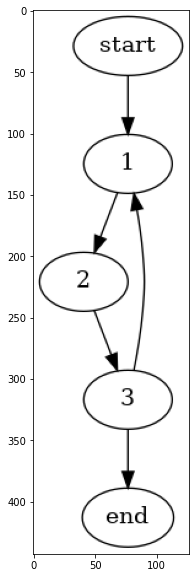

In [5]:
G = nx.DiGraph()

G.add_edge("start", 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, "end")
G.add_edge(3, 1)


fig, axs = plt.subplots(1, figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

name = "loop"
P.write_png(f'{name}.png')

plt.imshow(mpimg.imread(f'{name}.png'))
# plt.imshow(nx.nx_pydot.to_pydot(G))

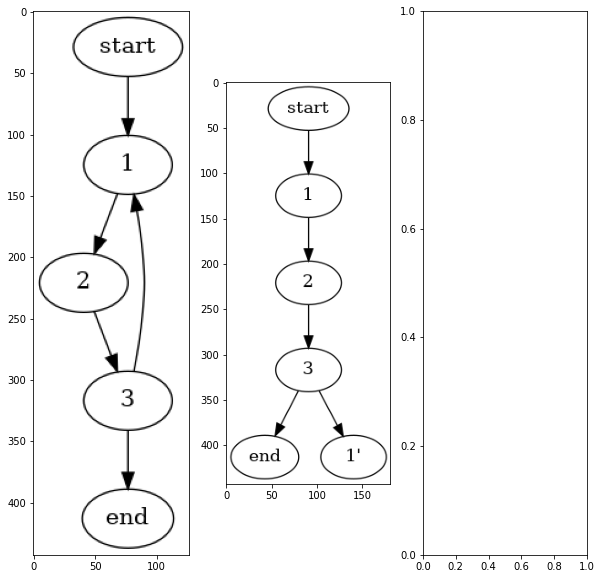

In [6]:
G = nx.DiGraph()

G.add_edge("start", 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, "end")
G.add_edge(3, 1)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

name = "loop"
P.write_png(f'{name}.png')

axs[0].imshow(mpimg.imread(f'{name}.png'))

name = "unwound"
G = nx.DiGraph()

G.add_edge("start", "1")
G.add_edge("1", "2")
G.add_edge("2", "3")
G.add_edge("3", "end")
G.add_edge("3", "1'")
P = nx.nx_pydot.to_pydot(G)
P.write_png(f'{name}.png')


axs[1].imshow(mpimg.imread(f'{name}.png'))

name = "unequal"
G = nx.DiGraph()

G.add_edge("start", "1")
G.add_edge("1", "2")
G.add_edge("2", "3")
G.add_edge("3", "end")
G.add_edge("3", "1'")
P = nx.nx_pydot.to_pydot(G)
P.write_png(f'{name}.png')


axs[1].imshow(mpimg.imread(f'{name}.png'))

# plt.imshow(nx.nx_pydot.to_pydot(G))

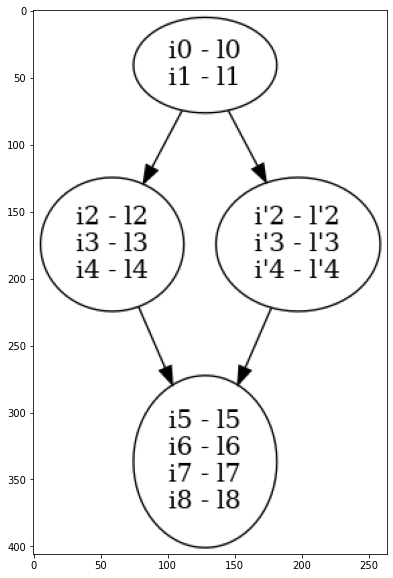

In [23]:
G = nx.DiGraph()

G.add_edge("start", 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, "end")
G.add_edge(3, 1)

fig, axs = plt.subplots(1,figsize=(10, 10))
P = nx.nx_pydot.to_pydot(G)

# name = "loop"
# P.write_png(f'{name}.png')

# axs[0].imshow(mpimg.imread(f'{name}.png'))

name = "graph_example"
G = nx.DiGraph()

n1 = "\n".join(f"i{i} - l{i}" for i in range(2))
n2 = "\n".join(f"i{i} - l{i}" for i in range(2, 5))
n3 = "\n".join(f"i'{i} - l'{i}" for i in range(2, 5))
n4 = "\n".join(f"i{i} - l{i}" for i in range(5, 9))

G.add_edge(n1, n2)
G.add_edge(n1, n3)
G.add_edge(n2, n4)
G.add_edge(n3, n4)


# G.add_edge("start", "1")
# G.add_edge("1", "2")
# G.add_edge("1", "3")
# G.add_edge("3", "4")
# G.add_edge("3", "5")
# G.add_edge("4", "6")
# G.add_edge("5", "6")
P = nx.nx_pydot.to_pydot(G)
P.write_png(f'{name}.png')


axs.imshow(mpimg.imread(f'{name}.png'))

# plt.imshow(nx.nx_pydot.to_pydot(G))